<a href="https://colab.research.google.com/github/HaoYamado/notebooks/blob/master/PyTorch_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://miro.medium.com/max/2400/1*aqNgmfyBIStLrf9k7d9cng.jpeg)

# Logistic Regression on PyTorch

*Линейная регрессия: *

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

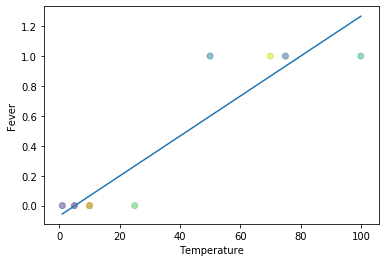

In [59]:
x = [1, 5, 10, 10, 25, 50, 70, 75, 100]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel('Fever')
plt.xlabel('Temperature')

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

## Логистическая регрессия in-depth

Prediction probability(прогнозирование вероятности):

1. Linear regression doesn't work (Линейная регрессия не работает)
2. Instead of predicting direct values: predict probability(вместо прогнозирования прямых значений: предсказывает вероятность)
![alt text](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/images/cross_entropy_final_4.png)

## Logistic Function g() (Логистическая функция g())

1. 'Two-class logistic regression' (Двухклассовая логистическая регрессия)



<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi mathvariant="bold-italic">y</mi>
  <mo>=</mo>
  <mi>A</mi>
  <mi mathvariant="bold-italic">x</mi>
  <mo>+</mo>
  <mi mathvariant="bold-italic">b</mi>
</math>, где y - вектор, содержащий предсказания 2-класса y_0 и y_1,
где метки y_0 = 0, y_1 = 1, также это вектор, а не матрица

---




# Building a Logistic Regression Model with Pytorch

In [0]:
"""
Step 1: Load Dataset
Step 2: Make Dataset iterable
Step 3: Create Model Class
Step 4: Instantiate Model Class
Step 5: Instantiate Loss Class
Step 6: Instantiate Optimizer CLass
Step 7: Train Model
"""
# Step 1: Loading MNIST Train Dataset

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [61]:
len(train_dataset)

60000

In [62]:
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [63]:
type(train_dataset[0])

tuple

In [64]:
# inspecting training dataset first element of tuple
# input matrix
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [65]:
# inspecting training dataset second element of tuple
""" The second element actually represetns the image's label. Meaning if second element says 5, it means the 28x28 
    matrix of number represents a digit 5."""
  
train_dataset[0][1]

5

### Displaying MNIST

In [66]:
# Verifying shape of MNIST image

""" As mentioned, a single MNIST image is of the shape 28 x 28 pixels """

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

train_dataset[0][0].numpy().shape

(1, 28, 28)

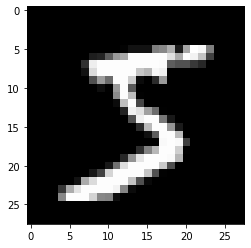

In [67]:
# Plot image of MNIST image
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [68]:
# Second element of tuple shows label

train_dataset[0][1]

5

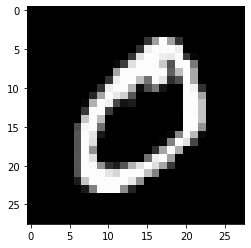

In [69]:
# Plot second image of MNIST image

show_img = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [70]:
# Second element of tuple shows label
# Label
train_dataset[1][1]

0

### Step 1b: Loading MNIST Test Dataset

In [71]:
test_dataset = dsets.MNIST(root= './data',
             train=False,
             transform=transforms.ToTensor())
len(test_dataset)

10000

In [72]:
# Test dataset elements
"""  
Exactly like the training set, 
the testing set has 10k tuples containing the 28x28 matrices 
and their resplective labels 
"""
type(test_dataset[0])

tuple

In [73]:
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

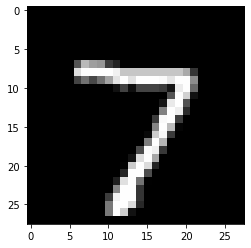

In [74]:
# Plot image sample from test dataset

show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [75]:
# Label
test_dataset[0][1]

7

### Step 2: Make Dataset iterable

1. Aim: make the dataset iterable
2. totaldata: 60000
3. mini-batch: 100:
3. Number of examples in 1 iteration
4. Iterations: 3000
4. 1 iteration: one mini-batch forward & backward pass
5. epochs:
5. epoch: running through the whole dataset once
5. epochs = iterations : totaldata/minibatch = 3000 : 60000/100 = 5

In [76]:
len(train_dataset)

60000

In [78]:
"""   
When the model goes through the whole 60k images once, 
learning how to classify 0-9, it's consider 1 epoch.
However, there's a concept of batch size where it means the model 
would look at 100 images before updating the model's weights, 
thereby learning. When the model updates its weights (parameters) 
after looking at all the images, this is considered 1 iteration.
"""
batch_size = 100

# We arbitrarily set 3000 iterations here whisch means the model would update 3000 times
n_iters = 3000

# One epoch consists of 60000/100 = 600 iterations.
# Because we would like to go through 3000 iterations,
# this implies we would have 3000/600 = 5 epochs as each epoch has 600 iterations.

num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [0]:
# Create iterable object: Training Dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

In [81]:
# check iterability 
import collections
isinstance(train_loader, collections.Iterable)

True

In [0]:
# Create Iterable object: Testig dataset

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [84]:
isinstance(test_loader, collections.Iterable)

True

In [86]:
# Iterate through dataset
img_1 = np.ones((28, 28))
img_2 = np.ones((28, 28))
lst = [img_1, img_2]

# Need to iterate
# Think of numbers as the images
for i in lst:
  print(i.shape)


(28, 28)
(28, 28)


### Step 3: Building Model

In [0]:
# Create model class: same as linear regression!:

class LogisticRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LogisticRegressionModel, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    out = self.linear(x)
    return out

### Step 4: Instantiate Model Class

Input dimension(input_dim): Size of image = 28 x 28 (784)
Ouput dimension(output_dim): 10 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [88]:
# Check size of dataset 
# this should be 28 x 28
train_dataset[0][0].size() 

torch.Size([1, 28, 28])

In [0]:
# Instantiate model class based on input and ou dimensions

input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

### Step 5: Instantiate Loss Class.
Logistic Regression: Cross Entropy Loss

In [0]:
# Create Cross Entry Loss Class
criterion = nn.CrossEntropyLoss()

**What happens in nn.CrossEntropyLoss()?**
It does 2 things at the same time.


1. Computes softmax(logistic/softmax function)
2. Computes cross entropy
![alt text](https://www.deeplearningwizard.com/deep_learning/practical_pytorch/images/cross_entropy_final_4.png)



### Step 6: Instantiate Optimizer class


*   Simlified equation
  *  <math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mrow>
      <mi>&#x03B8;<!-- θ --></mi>
      <mo>=</mo>
      <mi>&#x03B8;<!-- θ --></mi>
      <mo>&#x2212;<!-- − --></mo>
      <mi>&#x03B7;<!-- η --></mi>
      <mo>&#x22C5;<!-- ⋅ --></mo>
      <msub>
        <mi mathvariant="normal">&#x2207;<!-- ∇ --></mi>
        <mi>&#x03B8;<!-- θ --></mi>
      </msub>
    </mrow>
    <annotation encoding="application/x-tex">
  </semantics>
</math>, where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mi>&#x03B8;<!-- θ --></mi>
    <annotation encoding="application/x-tex"></annotation>
  </semantics>
</math>: parameters (our variables), <math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <mi>&#x03B7;<!-- η --></mi>
    <annotation encoding="application/x-tex"></annotation>
  </semantics>
</math> : learning rate (how fast we want to learn),<math xmlns="http://www.w3.org/1998/Math/MathML">
  <semantics>
    <msub>
      <mi mathvariant="normal">&#x2207;<!-- ∇ --></mi>
      <mi>&#x03B8;<!-- θ --></mi>
    </msub>
    <annotation encoding="application/x-tex"></annotation>
  </semantics>
</math>: parameter's gradients

*   Even simplier equation
  *  paramaters = parameters - learning_rate * parameters_gradients



In [0]:
# Create optimizer
learning_rate =0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)